In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

data_path = 'src/data/'

# Terror data

In [317]:
terror_encoding = 'ISO-8859-1'
df_terror = pd.read_csv(data_path + 'globalterrorism_2020.csv', encoding=terror_encoding, low_memory=False)

In [318]:
def missingness_map(df, columns):
    sns.heatmap(df_terror[columns].isnull(), cbar=False)
    plt.show()

## ID + Date

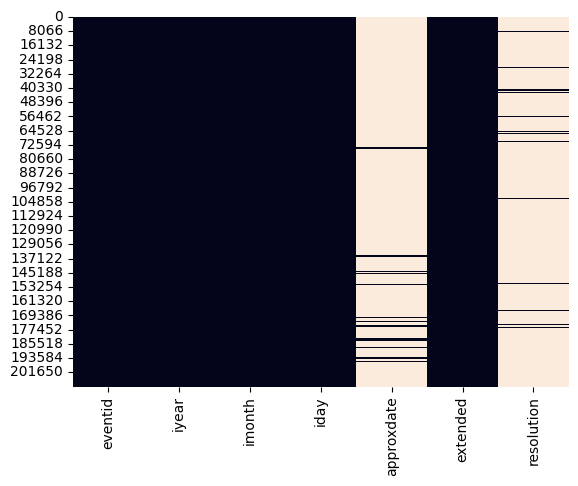

In [319]:
# missingness map
columnnames_date = ['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution']
missingness_map(df_terror, columnnames_date)

In [320]:
def clean_date(df):
    df_cleaned = df.drop(columns=['approxdate', 'extended', 'resolution'])

    # integer values
    df_cleaned.loc[df_cleaned['imonth'] == 0, 'imonth'] = None
    df_cleaned.loc[df_cleaned['iday'] == 0, 'iday'] = None

    return df_cleaned

print(df_terror.shape)
df_terror = clean_date(df_terror)
print(df_terror.shape)

(209706, 135)
(209706, 132)


## Incident Information

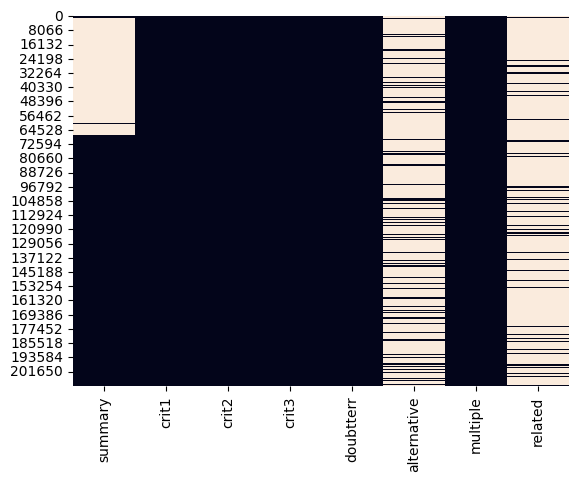

In [321]:
# missingness map
columnnames_incident_information = ['summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'multiple', 'related']
missingness_map(df_terror, columnnames_incident_information)

In [322]:
def clean_incident_information(df):
    df_cleaned = df.drop(columns=['doubtterr', 'alternative', 'alternative_txt'])

    # check all criterias are met
    criterion = lambda a, b, c: df_cleaned[(df_cleaned['crit1'] == a) & (df_cleaned['crit2'] == b) & (df_cleaned['crit3'] == c)].shape[0]
    assert (criterion(0, 0, 0) == 0 
            & criterion(1, 0, 0) == 0 
            & criterion(0, 1, 0) == 0 
            & criterion(0, 0, 1) == 0), 'At least 2 criterias must be satisfied'

    return df_cleaned

print(df_terror.shape)
df_terror = clean_incident_information(df_terror)
print(df_terror.shape)

(209706, 132)
(209706, 129)


## Incident Location

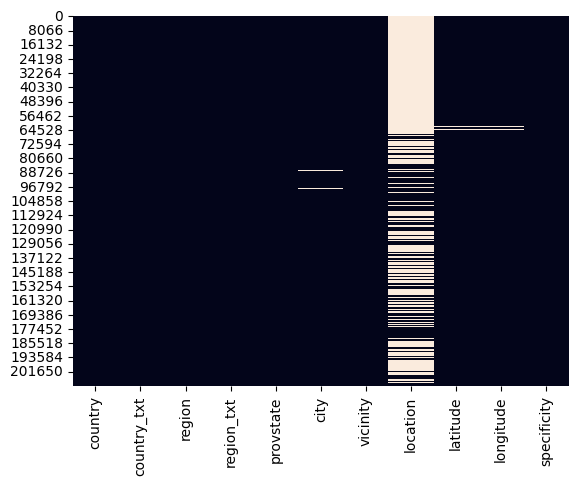

In [323]:
columnnames_incident_location = ['country', 'country_txt', 'region', 'region_txt', 'provstate', 
                                 'city', 'vicinity', 'location', 'latitude', 'longitude', 'specificity']
missingness_map(df_terror, columnnames_incident_location)

In [324]:
def clean_incident_location(df):
    df_cleaned = df.drop(columns=['provstate', 'city', 'vicinity', 'location', 'specificity'])

    # keep all attacks without location but set invalid location to None
    df_cleaned.loc[(df_cleaned['latitude'] < -90) | (df_cleaned['latitude'] > 90), 'latitude'] = None
    df_cleaned.loc[(df['longitude'] < -180) | (df_cleaned['longitude'] > 180), 'longitude'] = None

    return df_cleaned

print(df_terror.shape)
df_terror = clean_incident_location(df_terror)
print(df_terror.shape)

(209706, 129)
(209706, 124)


## Attack Information

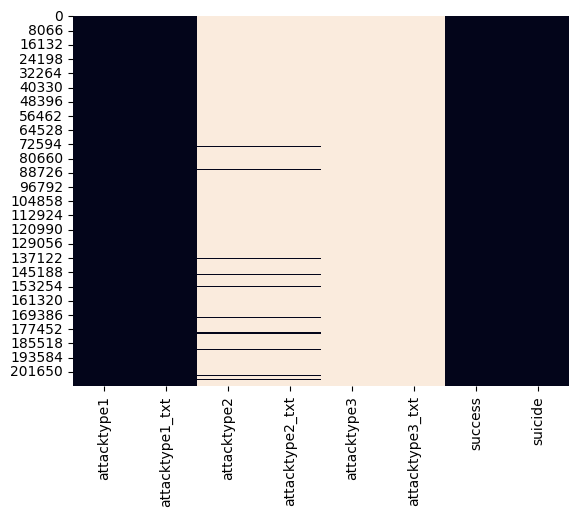

In [325]:
columnnames_attack_information = ['attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
                                  'success', 'suicide']
missingness_map(df_terror, columnnames_attack_information)

In [326]:
def clean_attack_information(df):
    df_cleaned = df.drop(columns=['attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt'])

    return df_cleaned

print(df_terror.shape)
df_terror = clean_attack_information(df_terror)
print(df_terror.shape)

(209706, 124)
(209706, 120)


## Weapon Information

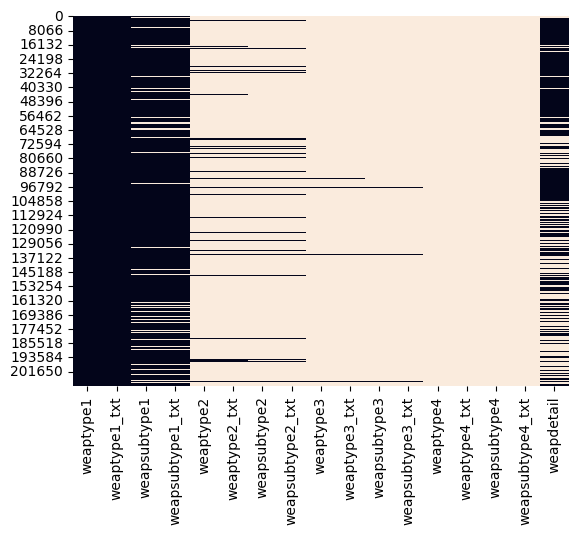

In [327]:
columnnames_weapon_information = ['weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
                                  'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
                                  'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
                                  'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
                                  'weapdetail']
missingness_map(df_terror, columnnames_weapon_information)

In [328]:
def clean_weapon_information(df):
    df_cleaned = df.drop(columns=['weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
                                  'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
                                  'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt'])
    
    return df_cleaned

print(df_terror.shape)
df_terror = clean_weapon_information(df_terror)
print(df_terror.shape)

(209706, 120)
(209706, 108)


## Target Victim Information

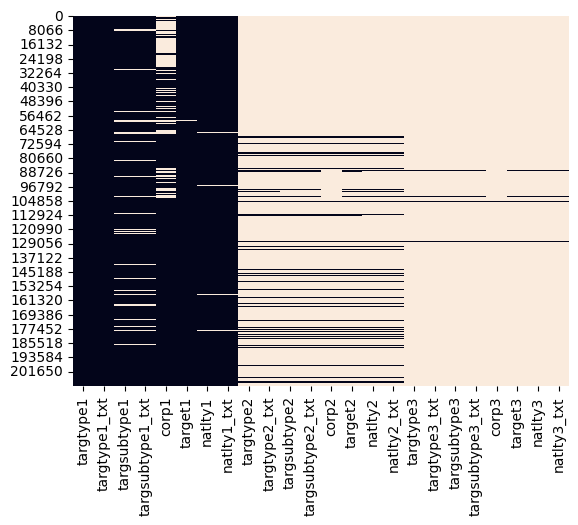

In [329]:
columnnames_target_victim_information = ['targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
                                         'corp1', 'target1', 'natlty1', 'natlty1_txt',
                                         'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt',
                                         'corp2', 'target2', 'natlty2', 'natlty2_txt',
                                         'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
                                         'corp3', 'target3', 'natlty3', 'natlty3_txt']
missingness_map(df_terror, columnnames_target_victim_information)

In [330]:
def clean_target_victim_information(df):
    df_cleaned = df.drop(columns=['targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt',
                                  'corp2', 'target2', 'natlty2', 'natlty2_txt',
                                  'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
                                  'corp3', 'target3', 'natlty3', 'natlty3_txt'])
    return df_cleaned

print(df_terror.shape)
df_terror = clean_target_victim_information(df_terror)
print(df_terror.shape)

(209706, 108)
(209706, 92)


## Perpetrator Information

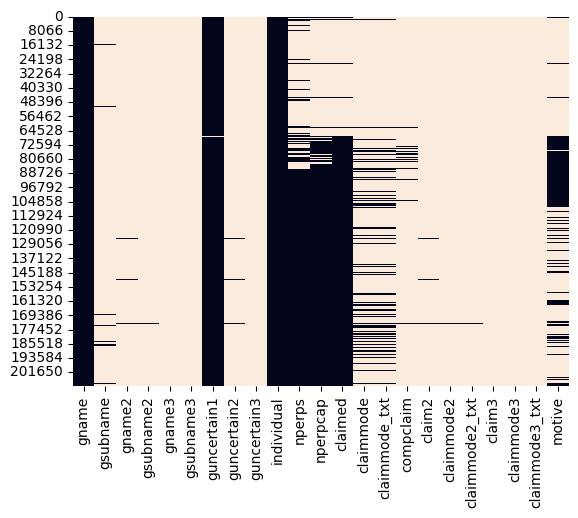

In [331]:
columnnames_perpetrator_information = ['gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3',
                                       'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps',
                                       'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'compclaim',
                                       'claim2', 'claimmode2', 'claimmode2_txt', 
                                       'claim3', 'claimmode3', 'claimmode3_txt',
                                       'motive']
missingness_map(df_terror, columnnames_perpetrator_information)

In [332]:
def clean_perpetrator_information(df):
    df_cleaned = df.drop(columns=['gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'guncertain2', 'guncertain3',
                                  'compclaim', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt'])
    
    # booleans
    # always 0 unless it's been proved to be claimed
    df_cleaned.loc[(df_cleaned['claimed'] == -9) | (df_cleaned['claimed'].isna()), 'claimed'] = 0

    # integer values
    df_cleaned.loc[(df_cleaned['nperps'] == -99) | (df_cleaned['nperps'] == -9), 'nperps'] = None
    df_cleaned.loc[(df_cleaned['nperpcap'] == -99) | (df_cleaned['nperpcap'] == -9), 'nperpcap'] = None

    return df_cleaned

print(df_terror.shape)
df_terror = clean_perpetrator_information(df_terror)
print(df_terror.shape)

(209706, 92)
(209706, 78)


## Casualities and Consequences

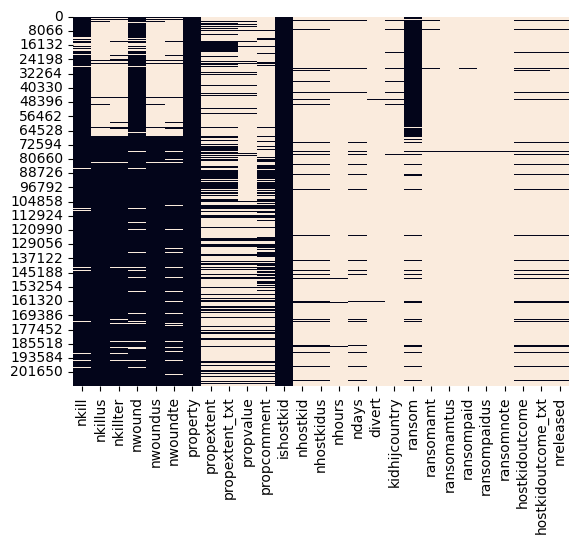

In [333]:
columnnames_casualities_and_consequences = ['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',
                                            'property', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 
                                            'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 
                                            'divert', 'kidhijcountry', 'ransom', 'ransomamt', 'ransomamtus', 
                                            'ransompaid', 'ransompaidus', 'ransomnote', 
                                            'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased']
missingness_map(df_terror, columnnames_casualities_and_consequences)

In [334]:
def clean_casualities_and_consequences(df):
    df_cleaned = df.drop(columns=['nkillus', 'nwoundus', 'propcomment', 'nhostkidus', 'divert', 'kidhijcountry', 
                                  'ransomamtus', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt'])
    
    # booleans
    df_cleaned.loc[(df_cleaned['property'] == -9) | (df_cleaned['property'].isna()), 'property'] = 0
    df_cleaned.loc[(df_cleaned['ishostkid'] == -9) | (df_cleaned['ishostkid'].isna()), 'ishostkid'] = 0
    df_cleaned.loc[(df_cleaned['ransom'] == -9) | (df_cleaned['ransom'].isna()), 'ransom'] = 0

    # integer values
    df_cleaned.loc[(df_cleaned['propvalue'] == -9) | (df_cleaned['propvalue'] == -99), 'propvalue'] = None
    df_cleaned.loc[(df_cleaned['nhostkid'] == -9) | (df_cleaned['nhostkid'] == -99), 'nhostkid'] = None
    df_cleaned.loc[(df_cleaned['nhours'] == -9) | (df_cleaned['nhours'] == -99), 'nhours'] = None
    df_cleaned.loc[(df_cleaned['ndays'] == -9) & (df_cleaned['ndays'] == -99), 'ndays'] = None
    df_cleaned.loc[(df_cleaned['ransomamt'] == -9) | (df_cleaned['ransomamt'] == -99), 'ransomamt'] = None
    df_cleaned.loc[(df_cleaned['ransompaid'] == -9) | (df_cleaned['ransompaid'] == -99), 'ransompaid'] = None

    return df_cleaned

print(df_terror.shape)
df_terror = clean_casualities_and_consequences(df_terror)
print(df_terror.shape)

(209706, 78)
(209706, 67)


## Additional Information and Sources

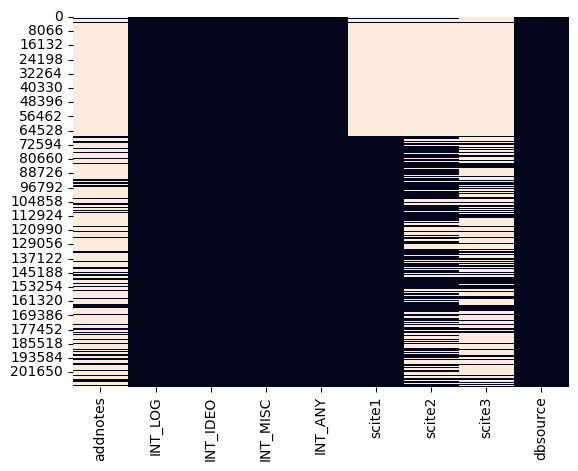

In [335]:
columnnames_additional_information_and_sources = ['addnotes', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 
                                                  'scite1', 'scite2', 'scite3', 'dbsource']
missingness_map(df_terror, columnnames_additional_information_and_sources)

In [336]:
def clean_additional_information_and_sources(df):
    df_cleaned = df.drop(columns=['addnotes', 'scite2', 'scite3', 'dbsource'])

    # booleans
    df_cleaned.loc[(df_cleaned['INT_LOG'] == -9) | (df_cleaned['INT_LOG'].isna()), 'INT_LOG'] = 0
    df_cleaned.loc[(df_cleaned['INT_IDEO'] == -9) | (df_cleaned['INT_IDEO'].isna()), 'INT_IDEO'] = 0
    df_cleaned.loc[(df_cleaned['INT_MISC'] == -9) | (df_cleaned['INT_MISC'].isna()), 'INT_MISC'] = 0
    df_cleaned.loc[(df_cleaned['INT_ANY'] == -9) | (df_cleaned['INT_ANY'].isna()), 'INT_ANY'] = 0

    return df_cleaned

print(df_terror.shape)
df_terror = clean_additional_information_and_sources(df_terror)
print(df_terror.shape)

(209706, 67)
(209706, 63)


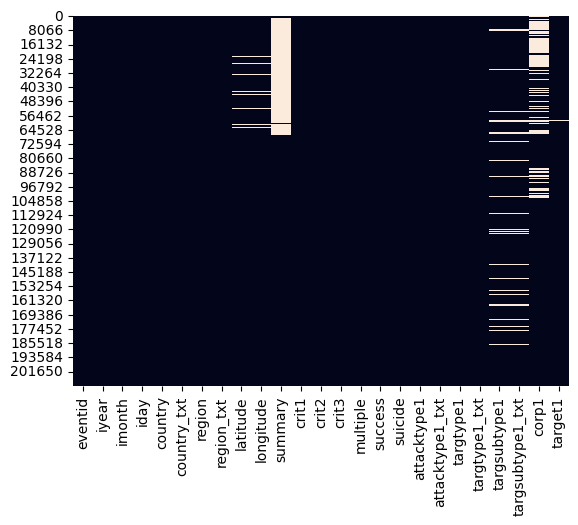

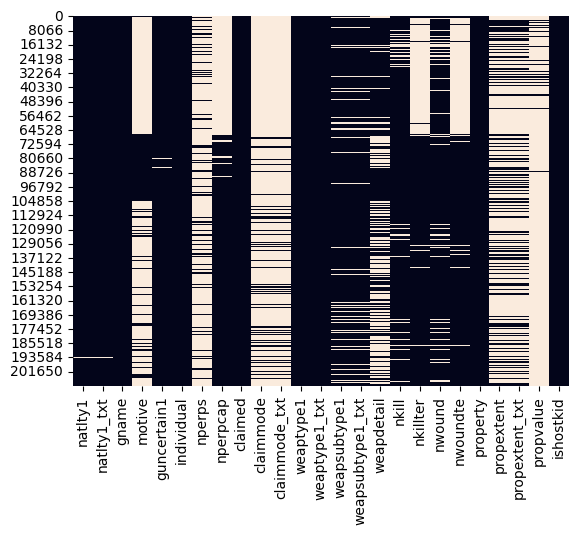

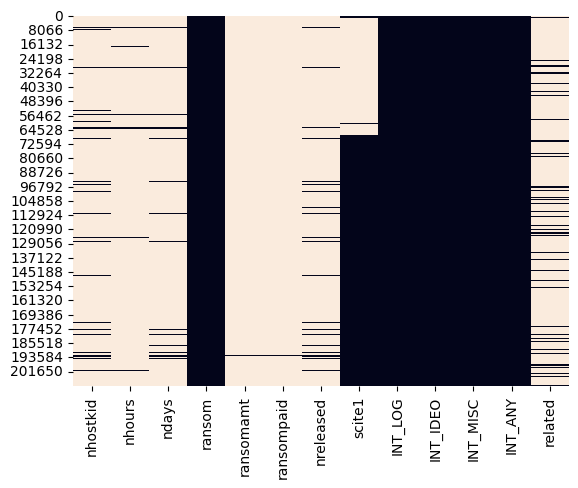

In [337]:
missingness_map(df_terror, list(df_terror.columns)[:25])
missingness_map(df_terror, list(df_terror.columns)[25:50])
missingness_map(df_terror, list(df_terror.columns)[50:])

In [338]:
df_terror.to_csv(data_path + 'globalterrorism_2020_cleaned.csv', encoding=terror_encoding)

# Country data

In [339]:
df_country = pd.read_csv(data_path + 'country_attributes.csv', low_memory=False, na_values='..')

df_country = (df_country.melt(id_vars=['Country Name', 'Series Name'], var_name='year')
              .assign(year=lambda x: x['year'].str.extract('(\d+)', expand=False))
              .pivot_table(index=['Country Name', 'year'], columns='Series Name', values='value', aggfunc='first')
              .reset_index())

df_country = df_country.drop(columns=['Population, total'])

df_country['year'] = df_country['year'].astype(int)
df_country = df_country[(df_country['year'] >= 1970) & (df_country['year'] <= 2020)]

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/var/folders/93/9bwp5y9s6p925yjm6qkgky980000gn/T/ipykernel_6675/3654022089.py:4: SyntaxWarning: invalid escape sequence '\d'
  .assign(year=lambda x: x['year'].str.extract('(\d+)', expand=False))


In [340]:
df_country.shape

(13495, 6)

In [341]:
df_pop = pd.read_csv(data_path + 'population.csv', low_memory=False)

df_pop = df_pop[(df_pop['Year'] >= 1970) & (df_pop['Year'] <= 2020)]

In [342]:
df_pop.shape

(13056, 4)